In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
car_data = pd.read_excel("Almaty_vv2.xlsx")

In [3]:
car_data

,City,Mark,Model,Price,Year,Body,EngineSize,FuelType,GearboxType,Mileage,Color
0,Алматы,Toyota,Avensis,4200000,2003,седан,2.0,бензин,автомат,200000,серебристый
1,Алматы,Mitsubishi,Delica,12500000,2006,микроавтобус,3.0,бензин,автомат,180000,серебристый
2,Алматы,Infiniti,QX80,28050000,2018,внедорожник,5.6,бензин,автомат,22000,белый
3,Алматы,Nissan,Patrol,11500000,2012,внедорожник,5.6,бензин,автомат,105000,белый
4,Алматы,ВАЗ,(Lada)\tLargus\tCross,4800000,2019,минивэн,1.6,бензин,механика,90000,черный
...,...,...,...,...,...,...,...,...,...,...,...
8670,Алматы,ВАЗ,(Lada)\t2170\t(седан),2000000,2015,седан,6.0,бензин,механика,85000,белый
8671,Алматы,Dodge,Charger,3300000,2009,седан,3.5,бензин,автомат,73000,черный
8672,Алматы,Dodge,Magnum,2900000,2008,универсал,5.7,бензин,автомат,73000,черный
8673,Алматы,Chrysler,300C,2900000,2009,седан,3.5,бензин,автомат,72000,черный


In [4]:
Random_forest_data = pd.read_excel("Random_forest.xlsx")
Random_forest_data.tail()

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
1727,3847,BMW,318,2002,1.9,бензин,купе,механика,350350,серебристый,2800000,2699000.0
1728,8630,ГАЗ,ГАЗель\tNEXT,2018,2.7,бензин,фургон,механика,120000,белый,8499999,8044700.0
1729,5003,Toyota,Land\tCruiser,2008,4.7,газ-бензин,внедорожник,автомат,263000,белый,14600000,13250000.0
1730,4902,Nissan,Patrol,2013,5.6,бензин,внедорожник,автомат,222128,черный,12820000,13095000.0
1731,313,Kia,Cerato\tKoup,2012,2.0,бензин,купе,типтроник,100000,серебристый,4900000,5550000.0


In [5]:
Random_forest_data.shape

(1732, 12)

In [6]:
value = 0.13

In [7]:
Random_forest_data_normal = Random_forest_data.query("predictions < actual_price + (@value*actual_price) & predictions > actual_price - (@value*actual_price)") 
Random_forest_data_normal

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
2,5268,Volkswagen,Golf,1997,1.8,бензин,хэтчбек,механика,240000,синий,1700000,1835000.0
3,7910,Subaru,Tribeca,2007,3.6,бензин,кроссовер,автомат,265983,белый,5250000,5839000.0
4,3182,Daewoo,Nexia,2013,1.5,бензин,седан,механика,190000,белый,1640000,1760000.0
7,3236,Nissan,Qashqai,2007,2.0,бензин,кроссовер,вариатор,240550,коричневый,4620000,4565000.0
8,5989,Volkswagen,Passat,1992,1.8,бензин,универсал,механика,290000,бордовый,1550000,1395400.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1726,3796,Toyota,Land\tCruiser,2012,4.6,бензин,внедорожник,автомат,145000,черный,20800000,21515000.0
1727,3847,BMW,318,2002,1.9,бензин,купе,механика,350350,серебристый,2800000,2699000.0
1728,8630,ГАЗ,ГАЗель\tNEXT,2018,2.7,бензин,фургон,механика,120000,белый,8499999,8044700.0
1729,5003,Toyota,Land\tCruiser,2008,4.7,газ-бензин,внедорожник,автомат,263000,белый,14600000,13250000.0


In [8]:
Random_forest_data_notnormal = Random_forest_data.query("predictions > actual_price + (@value*actual_price) | predictions < actual_price - (@value*actual_price)")
Random_forest_data_notnormal

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
0,2527,Land,Rover\tFreelander,2014,2.0,бензин,кроссовер,автомат,59000,синий,9700000,13990000.0
1,6141,Toyota,Corolla,2011,1.6,бензин,седан,автомат,137500,белый,5400000,6225000.0
5,3285,Porsche,Cayenne,2008,4.8,бензин,кроссовер,типтроник,109000,голубой,7600000,9310000.0
6,8576,Toyota,HiAce,2012,2.7,бензин,микроавтобус,механика,226000,серебристый,8900000,10178998.0
9,1696,Hyundai,Coupe,2004,2.0,бензин,купе,автомат,155000,красный,2900000,3335000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1719,8181,Toyota,Land\tCruiser,2015,4.6,бензин,внедорожник,автомат,49700,белый,32500000,24590000.0
1720,3133,ВАЗ,(Lada)\t2121\tНива,2004,1.7,бензин,внедорожник,механика,170000,белый,1700000,1069555.3
1723,8545,Mitsubishi,Galant,2005,2.4,бензин,седан,автомат,429655,серый,2500000,4304000.0
1724,526,Volkswagen,Transporter,2007,2.5,дизель,минивэн,механика,173000,белый,8000000,5549000.0


In [9]:
XGboost_data = pd.read_excel("XGBoost.xlsx")
XGboost_data.tail()

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
1727,3847,BMW,318,2002,1.9,бензин,купе,механика,350350,серебристый,2800000,2720490.75
1728,8630,ГАЗ,ГАЗель\tNEXT,2018,2.7,бензин,фургон,механика,120000,белый,8499999,6916988.00
1729,5003,Toyota,Land\tCruiser,2008,4.7,газ-бензин,внедорожник,автомат,263000,белый,14600000,13583774.00
1730,4902,Nissan,Patrol,2013,5.6,бензин,внедорожник,автомат,222128,черный,12820000,14961265.00
1731,313,Kia,Cerato\tKoup,2012,2.0,бензин,купе,типтроник,100000,серебристый,4900000,6880113.50


In [10]:
XGboost_data.shape

(1732, 12)

In [11]:
XGboost_data_normal = XGboost_data.query("predictions < actual_price + (@value*actual_price) & predictions > actual_price - (@value*actual_price)")
XGboost_data_normal

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
1,6141,Toyota,Corolla,2011,1.6,бензин,седан,автомат,137500,белый,5400000,5.460000e+06
2,5268,Volkswagen,Golf,1997,1.8,бензин,хэтчбек,механика,240000,синий,1700000,1.817381e+06
3,7910,Subaru,Tribeca,2007,3.6,бензин,кроссовер,автомат,265983,белый,5250000,5.880989e+06
4,3182,Daewoo,Nexia,2013,1.5,бензин,седан,механика,190000,белый,1640000,1.612158e+06
7,3236,Nissan,Qashqai,2007,2.0,бензин,кроссовер,вариатор,240550,коричневый,4620000,4.460375e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
1720,3133,ВАЗ,(Lada)\t2121\tНива,2004,1.7,бензин,внедорожник,механика,170000,белый,1700000,1.918292e+06
1722,322,Toyota,Camry,2003,2.4,бензин,седан,автомат,233000,белый,4500000,4.362805e+06
1726,3796,Toyota,Land\tCruiser,2012,4.6,бензин,внедорожник,автомат,145000,черный,20800000,1.944791e+07
1727,3847,BMW,318,2002,1.9,бензин,купе,механика,350350,серебристый,2800000,2.720491e+06


In [12]:
XGboost_data_notnormal = XGboost_data.query("predictions > actual_price + (@value*actual_price) | predictions < actual_price - (@value*actual_price)")
XGboost_data_notnormal

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
0,2527,Land,Rover\tFreelander,2014,2.0,бензин,кроссовер,автомат,59000,синий,9700000,14644404.0
5,3285,Porsche,Cayenne,2008,4.8,бензин,кроссовер,типтроник,109000,голубой,7600000,8628735.0
6,8576,Toyota,HiAce,2012,2.7,бензин,микроавтобус,механика,226000,серебристый,8900000,10275888.0
8,5989,Volkswagen,Passat,1992,1.8,бензин,универсал,механика,290000,бордовый,1550000,1024011.5
10,1552,Suzuki,Grand\tVitara,2004,2.0,бензин,внедорожник,автомат,212056,золотистый,3599000,4099111.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1724,526,Volkswagen,Transporter,2007,2.5,дизель,минивэн,механика,173000,белый,8000000,4772302.0
1725,6566,Hyundai,Genesis,2019,3.3,бензин,седан,автомат,47644,черный,14500000,10707120.0
1728,8630,ГАЗ,ГАЗель\tNEXT,2018,2.7,бензин,фургон,механика,120000,белый,8499999,6916988.0
1730,4902,Nissan,Patrol,2013,5.6,бензин,внедорожник,автомат,222128,черный,12820000,14961265.0


In [13]:
Knn_data = pd.read_excel("KNN.xlsx")
Knn_data.tail()

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
1727,3847,BMW,318,2002,1.9,бензин,купе,механика,350350,серебристый,2800000,2.550000e+06
1728,8630,ГАЗ,ГАЗель\tNEXT,2018,2.7,бензин,фургон,механика,120000,белый,8499999,4.888667e+06
1729,5003,Toyota,Land\tCruiser,2008,4.7,газ-бензин,внедорожник,автомат,263000,белый,14600000,4.385714e+06
1730,4902,Nissan,Patrol,2013,5.6,бензин,внедорожник,автомат,222128,черный,12820000,2.780000e+06
1731,313,Kia,Cerato\tKoup,2012,2.0,бензин,купе,типтроник,100000,серебристый,4900000,6.457143e+06


In [14]:
Knn_data.shape

(1732, 12)

In [15]:
Knn_data_normal = Knn_data.query("predictions < actual_price + (@value*actual_price) & predictions > actual_price - (@value*actual_price)")
Knn_data_normal

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
1,6141,Toyota,Corolla,2011,1.6,бензин,седан,автомат,137500,белый,5400000,4.870000e+06
11,2317,Toyota,Camry,2017,2.5,бензин,седан,автомат,19000,черный,13300000,1.271714e+07
14,2416,Toyota,Yaris,2011,1.5,бензин,седан,автомат,170000,белый,5000000,5.640000e+06
17,4369,Subaru,Forester,2014,2.5,бензин,кроссовер,автомат,107000,белый,7200000,7.042857e+06
23,1243,Subaru,Forester,2014,2.5,бензин,кроссовер,вариатор,103000,белый,9300000,8.228571e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
1666,7787,Toyota,Land\tCruiser,2004,4.7,бензин,внедорожник,автомат,280342,черный,8250000,8.357143e+06
1672,8443,BMW,530,2008,3.0,бензин,седан,автомат,178000,белый,6188000,5.732857e+06
1709,1885,Toyota,Land\tCruiser,1999,4.2,дизель,внедорожник,автомат,290000,серебристый,4700000,4.491286e+06
1723,8545,Mitsubishi,Galant,2005,2.4,бензин,седан,автомат,429655,серый,2500000,2.574286e+06


In [16]:
Knn_data_notnormal = Knn_data.query("predictions > actual_price + (@value*actual_price) | predictions < actual_price - (@value*actual_price)")
Knn_data_notnormal

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
0,2527,Land,Rover\tFreelander,2014,2.0,бензин,кроссовер,автомат,59000,синий,9700000,1.645000e+07
2,5268,Volkswagen,Golf,1997,1.8,бензин,хэтчбек,механика,240000,синий,1700000,5.735714e+06
3,7910,Subaru,Tribeca,2007,3.6,бензин,кроссовер,автомат,265983,белый,5250000,3.398571e+06
4,3182,Daewoo,Nexia,2013,1.5,бензин,седан,механика,190000,белый,1640000,5.321429e+06
5,3285,Porsche,Cayenne,2008,4.8,бензин,кроссовер,типтроник,109000,голубой,7600000,1.279857e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
1726,3796,Toyota,Land\tCruiser,2012,4.6,бензин,внедорожник,автомат,145000,черный,20800000,9.550000e+06
1728,8630,ГАЗ,ГАЗель\tNEXT,2018,2.7,бензин,фургон,механика,120000,белый,8499999,4.888667e+06
1729,5003,Toyota,Land\tCruiser,2008,4.7,газ-бензин,внедорожник,автомат,263000,белый,14600000,4.385714e+06
1730,4902,Nissan,Patrol,2013,5.6,бензин,внедорожник,автомат,222128,черный,12820000,2.780000e+06


In [17]:
Ridge_data = pd.read_excel("Ridge.xlsx")
Ridge_data.tail()

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
1727,3847,BMW,318,2002,1.9,бензин,купе,механика,350350,серебристый,2800000,2.604463e+06
1728,8630,ГАЗ,ГАЗель\tNEXT,2018,2.7,бензин,фургон,механика,120000,белый,8499999,1.051789e+07
1729,5003,Toyota,Land\tCruiser,2008,4.7,газ-бензин,внедорожник,автомат,263000,белый,14600000,1.453720e+07
1730,4902,Nissan,Patrol,2013,5.6,бензин,внедорожник,автомат,222128,черный,12820000,2.015379e+07
1731,313,Kia,Cerato\tKoup,2012,2.0,бензин,купе,типтроник,100000,серебристый,4900000,8.158161e+06


In [18]:
Ridge_data.shape

(1732, 12)

In [19]:
Ridge_data_normal = Ridge_data.query("predictions < actual_price + (@value*actual_price) & predictions > actual_price - (@value*actual_price)")
Ridge_data_normal

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
0,2527,Land,Rover\tFreelander,2014,2.0,бензин,кроссовер,автомат,59000,синий,9700000,9.729345e+06
1,6141,Toyota,Corolla,2011,1.6,бензин,седан,автомат,137500,белый,5400000,5.078495e+06
6,8576,Toyota,HiAce,2012,2.7,бензин,микроавтобус,механика,226000,серебристый,8900000,9.319268e+06
14,2416,Toyota,Yaris,2011,1.5,бензин,седан,автомат,170000,белый,5000000,4.437916e+06
26,4663,Nissan,X-Trail,2016,2.0,бензин,кроссовер,автомат,70000,черный,10400000,1.055599e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
1716,341,Toyota,Sienna,2010,2.7,бензин,минивэн,автомат,100000,серебристый,8500000,9.065126e+06
1718,8169,Toyota,Corolla,2019,1.6,бензин,седан,типтроник,20000,серебристый,9100000,8.806388e+06
1725,6566,Hyundai,Genesis,2019,3.3,бензин,седан,автомат,47644,черный,14500000,1.440193e+07
1727,3847,BMW,318,2002,1.9,бензин,купе,механика,350350,серебристый,2800000,2.604463e+06


In [20]:
Ridge_data_notnormal = Knn_data.query("predictions > actual_price + (@value*actual_price) | predictions < actual_price - (@value*actual_price)")
Ridge_data_notnormal

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
0,2527,Land,Rover\tFreelander,2014,2.0,бензин,кроссовер,автомат,59000,синий,9700000,1.645000e+07
2,5268,Volkswagen,Golf,1997,1.8,бензин,хэтчбек,механика,240000,синий,1700000,5.735714e+06
3,7910,Subaru,Tribeca,2007,3.6,бензин,кроссовер,автомат,265983,белый,5250000,3.398571e+06
4,3182,Daewoo,Nexia,2013,1.5,бензин,седан,механика,190000,белый,1640000,5.321429e+06
5,3285,Porsche,Cayenne,2008,4.8,бензин,кроссовер,типтроник,109000,голубой,7600000,1.279857e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
1726,3796,Toyota,Land\tCruiser,2012,4.6,бензин,внедорожник,автомат,145000,черный,20800000,9.550000e+06
1728,8630,ГАЗ,ГАЗель\tNEXT,2018,2.7,бензин,фургон,механика,120000,белый,8499999,4.888667e+06
1729,5003,Toyota,Land\tCruiser,2008,4.7,газ-бензин,внедорожник,автомат,263000,белый,14600000,4.385714e+06
1730,4902,Nissan,Patrol,2013,5.6,бензин,внедорожник,автомат,222128,черный,12820000,2.780000e+06


In [21]:
Lasso_data = pd.read_excel("Lasso.xlsx")
Lasso_data.tail()

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
1727,3847,BMW,318,2002,1.9,бензин,купе,механика,350350,серебристый,2800000,2.603845e+06
1728,8630,ГАЗ,ГАЗель\tNEXT,2018,2.7,бензин,фургон,механика,120000,белый,8499999,1.051837e+07
1729,5003,Toyota,Land\tCruiser,2008,4.7,газ-бензин,внедорожник,автомат,263000,белый,14600000,1.453791e+07
1730,4902,Nissan,Patrol,2013,5.6,бензин,внедорожник,автомат,222128,черный,12820000,2.015480e+07
1731,313,Kia,Cerato\tKoup,2012,2.0,бензин,купе,типтроник,100000,серебристый,4900000,8.157713e+06


In [22]:
Lasso_data.shape

(1732, 12)

In [23]:
Lasso_data_normal = Lasso_data.query("predictions < actual_price + (@value*actual_price) & predictions > actual_price - (@value*actual_price)")
Lasso_data_normal

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
0,2527,Land,Rover\tFreelander,2014,2.0,бензин,кроссовер,автомат,59000,синий,9700000,9.728732e+06
1,6141,Toyota,Corolla,2011,1.6,бензин,седан,автомат,137500,белый,5400000,5.078285e+06
6,8576,Toyota,HiAce,2012,2.7,бензин,микроавтобус,механика,226000,серебристый,8900000,9.319293e+06
14,2416,Toyota,Yaris,2011,1.5,бензин,седан,автомат,170000,белый,5000000,4.437593e+06
26,4663,Nissan,X-Trail,2016,2.0,бензин,кроссовер,автомат,70000,черный,10400000,1.055536e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
1716,341,Toyota,Sienna,2010,2.7,бензин,минивэн,автомат,100000,серебристый,8500000,9.065154e+06
1718,8169,Toyota,Corolla,2019,1.6,бензин,седан,типтроник,20000,серебристый,9100000,8.806216e+06
1725,6566,Hyundai,Genesis,2019,3.3,бензин,седан,автомат,47644,черный,14500000,1.440239e+07
1727,3847,BMW,318,2002,1.9,бензин,купе,механика,350350,серебристый,2800000,2.603845e+06


In [24]:
Lasso_data_notnormal = Knn_data.query("predictions > actual_price + (@value*actual_price) | predictions < actual_price - (@value*actual_price)")
Lasso_data_notnormal

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
0,2527,Land,Rover\tFreelander,2014,2.0,бензин,кроссовер,автомат,59000,синий,9700000,1.645000e+07
2,5268,Volkswagen,Golf,1997,1.8,бензин,хэтчбек,механика,240000,синий,1700000,5.735714e+06
3,7910,Subaru,Tribeca,2007,3.6,бензин,кроссовер,автомат,265983,белый,5250000,3.398571e+06
4,3182,Daewoo,Nexia,2013,1.5,бензин,седан,механика,190000,белый,1640000,5.321429e+06
5,3285,Porsche,Cayenne,2008,4.8,бензин,кроссовер,типтроник,109000,голубой,7600000,1.279857e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
1726,3796,Toyota,Land\tCruiser,2012,4.6,бензин,внедорожник,автомат,145000,черный,20800000,9.550000e+06
1728,8630,ГАЗ,ГАЗель\tNEXT,2018,2.7,бензин,фургон,механика,120000,белый,8499999,4.888667e+06
1729,5003,Toyota,Land\tCruiser,2008,4.7,газ-бензин,внедорожник,автомат,263000,белый,14600000,4.385714e+06
1730,4902,Nissan,Patrol,2013,5.6,бензин,внедорожник,автомат,222128,черный,12820000,2.780000e+06


In [25]:
Linear_data = pd.read_excel("Linear.xlsx")
Linear_data.tail()

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
1727,3847,BMW,318,2002,1.9,бензин,купе,механика,350350,серебристый,2800000,2.603843e+06
1728,8630,ГАЗ,ГАЗель\tNEXT,2018,2.7,бензин,фургон,механика,120000,белый,8499999,1.051837e+07
1729,5003,Toyota,Land\tCruiser,2008,4.7,газ-бензин,внедорожник,автомат,263000,белый,14600000,1.453791e+07
1730,4902,Nissan,Patrol,2013,5.6,бензин,внедорожник,автомат,222128,черный,12820000,2.015481e+07
1731,313,Kia,Cerato\tKoup,2012,2.0,бензин,купе,типтроник,100000,серебристый,4900000,8.157711e+06


In [26]:
Linear_data_normal = Linear_data.query("predictions < actual_price + (@value*actual_price) & predictions > actual_price - (@value*actual_price)")
Linear_data_normal

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
0,2527,Land,Rover\tFreelander,2014,2.0,бензин,кроссовер,автомат,59000,синий,9700000,9.728731e+06
1,6141,Toyota,Corolla,2011,1.6,бензин,седан,автомат,137500,белый,5400000,5.078285e+06
6,8576,Toyota,HiAce,2012,2.7,бензин,микроавтобус,механика,226000,серебристый,8900000,9.319293e+06
14,2416,Toyota,Yaris,2011,1.5,бензин,седан,автомат,170000,белый,5000000,4.437593e+06
26,4663,Nissan,X-Trail,2016,2.0,бензин,кроссовер,автомат,70000,черный,10400000,1.055536e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
1716,341,Toyota,Sienna,2010,2.7,бензин,минивэн,автомат,100000,серебристый,8500000,9.065155e+06
1718,8169,Toyota,Corolla,2019,1.6,бензин,седан,типтроник,20000,серебристый,9100000,8.806214e+06
1725,6566,Hyundai,Genesis,2019,3.3,бензин,седан,автомат,47644,черный,14500000,1.440239e+07
1727,3847,BMW,318,2002,1.9,бензин,купе,механика,350350,серебристый,2800000,2.603843e+06


In [27]:
Linear_data_notnormal = Knn_data.query("predictions > actual_price + (@value*actual_price) | predictions < actual_price - (@value*actual_price)")
Linear_data_notnormal

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
0,2527,Land,Rover\tFreelander,2014,2.0,бензин,кроссовер,автомат,59000,синий,9700000,1.645000e+07
2,5268,Volkswagen,Golf,1997,1.8,бензин,хэтчбек,механика,240000,синий,1700000,5.735714e+06
3,7910,Subaru,Tribeca,2007,3.6,бензин,кроссовер,автомат,265983,белый,5250000,3.398571e+06
4,3182,Daewoo,Nexia,2013,1.5,бензин,седан,механика,190000,белый,1640000,5.321429e+06
5,3285,Porsche,Cayenne,2008,4.8,бензин,кроссовер,типтроник,109000,голубой,7600000,1.279857e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
1726,3796,Toyota,Land\tCruiser,2012,4.6,бензин,внедорожник,автомат,145000,черный,20800000,9.550000e+06
1728,8630,ГАЗ,ГАЗель\tNEXT,2018,2.7,бензин,фургон,механика,120000,белый,8499999,4.888667e+06
1729,5003,Toyota,Land\tCruiser,2008,4.7,газ-бензин,внедорожник,автомат,263000,белый,14600000,4.385714e+06
1730,4902,Nissan,Patrol,2013,5.6,бензин,внедорожник,автомат,222128,черный,12820000,2.780000e+06


In [28]:
random_set = set(Random_forest_data_notnormal.car_id)
xgboost_set = set(XGboost_data_notnormal.car_id)
linear_set = set(Linear_data_notnormal.car_id)
lasso_set = set(Lasso_data_notnormal.car_id)
ridge_set = set(Ridge_data_notnormal.car_id)
knn_set = set(Knn_data_notnormal.car_id)

# print(len(random_set))
# print(len(xgboost_set))
# print(len(linear_set))
# print(len(lasso_set))
# print(len(ridge_set))
# print(len(knn_set))
print("Intersection:",len(knn_set.intersection(random_set,xgboost_set,linear_set,ridge_set,lasso_set)))
intersected_car_ids = knn_set.intersection(random_set,xgboost_set,linear_set,ridge_set,lasso_set)
df = pd.DataFrame({'car_id':list(intersected_car_ids)})

# print(A.intersection(B, C, D))

Intersection: 487


In [29]:
print(intersected_car_ids)

{2048, 8194, 8198, 8206, 6159, 8213, 6167, 24, 2074, 6170, 27, 6173, 33, 6178, 4134, 39, 6189, 4142, 6193, 8241, 6195, 49, 4152, 8256, 68, 69, 8263, 2122, 4171, 2123, 8268, 6223, 8273, 4177, 83, 2135, 6233, 6234, 4187, 6239, 2143, 6243, 2151, 4206, 111, 6257, 6258, 6262, 2167, 4214, 2175, 8324, 4230, 2184, 140, 8335, 4241, 4242, 4243, 149, 6301, 4254, 4256, 167, 2217, 2220, 173, 176, 2228, 6324, 6326, 4281, 6331, 8380, 4285, 8383, 8385, 8386, 4296, 6347, 6350, 4304, 6357, 4313, 6362, 6363, 8411, 6367, 6374, 6379, 8430, 8447, 257, 8455, 2312, 2313, 4377, 4380, 8478, 2337, 8482, 2343, 6441, 298, 8494, 2350, 6453, 313, 6458, 2377, 6491, 350, 8547, 4461, 6515, 6521, 4476, 6525, 2428, 4477, 8576, 8581, 392, 6537, 4493, 397, 8592, 4497, 403, 2457, 4505, 8602, 4509, 414, 421, 8618, 4525, 4527, 8624, 6582, 6586, 6591, 2504, 4555, 460, 2510, 8655, 2516, 6616, 4571, 2527, 6628, 4580, 6631, 6635, 6636, 6637, 6640, 4601, 4610, 526, 2575, 529, 4625, 6675, 4631, 2587, 2590, 554, 4651, 6701, 6703, 67

In [30]:
print(df)

     car_id
0      2048
1      8194
2      8198
3      8206
4      6159
..      ...
482    8179
483    8181
484    6135
485    2041
486    8186

[487 rows x 1 columns]


In [31]:
intersected_sel = XGboost_data_notnormal[XGboost_data_notnormal.car_id.isin(intersected_car_ids)]
intersected_sel

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
0,2527,Land,Rover\tFreelander,2014,2.0,бензин,кроссовер,автомат,59000,синий,9700000,14644404.0
5,3285,Porsche,Cayenne,2008,4.8,бензин,кроссовер,типтроник,109000,голубой,7600000,8628735.0
6,8576,Toyota,HiAce,2012,2.7,бензин,микроавтобус,механика,226000,серебристый,8900000,10275888.0
12,4285,Mercedes-Benz,S\t450,2006,4.5,бензин,седан,автомат,293196,серебристый,7000000,5823991.5
16,7084,BMW,X6,2012,4.4,бензин,кроссовер,типтроник,76000,черный,10500000,16097132.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1710,1302,Lexus,GX\t460,2013,4.6,бензин,внедорожник,типтроник,107000,черный,16999999,21498130.0
1717,4230,Kia,Cee’d,2013,1.6,бензин,хэтчбек,типтроник,253000,коричневый,5144000,4256721.0
1719,8181,Toyota,Land\tCruiser,2015,4.6,бензин,внедорожник,автомат,49700,белый,32500000,26162330.0
1724,526,Volkswagen,Transporter,2007,2.5,дизель,минивэн,механика,173000,белый,8000000,4772302.0


In [32]:
df = pd.DataFrame(intersected_sel[intersected_sel.Mark =='Toyota'])
df

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
6,8576,Toyota,HiAce,2012,2.7,бензин,микроавтобус,механика,226000,серебристый,8900000,1.027589e+07
82,6640,Toyota,Carina\tE,1993,2.0,бензин,хэтчбек,механика,402162,бордовый,1900000,1.626820e+06
102,8618,Toyota,Land\tCruiser\tPrado,1998,3.0,дизель,внедорожник,автомат,123456,синий,4800000,5.441435e+06
144,2457,Toyota,Land\tCruiser\tPrado,1997,3.4,бензин,внедорожник,механика,353000,белый,3599000,4.809228e+06
189,6326,Toyota,4Runner,2018,4.0,бензин,внедорожник,автомат,35398,черный,16300000,2.150139e+07
191,7754,Toyota,Yaris,2008,1.3,бензин,седан,автомат,284894,белый,4190000,3.497830e+06
202,3171,Toyota,Alphard,2004,2.4,газ-бензин,минивэн,автомат,250000,белый,3450000,4.791722e+06
259,6094,Toyota,Tacoma,2008,4.0,бензин,пикап,автомат,209214,серый,13000000,8.258376e+06
274,3687,Toyota,RAV\t4,2007,2.0,бензин,кроссовер,автомат,145000,черный,7300000,6.334390e+06
297,7125,Toyota,Camry,1999,2.2,бензин,седан,автомат,1600000,серый,1750000,2.982621e+06


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

[Text(0, 0.5, 'Frequency of mark'), Text(0.5, 0, 'Car Mark')]

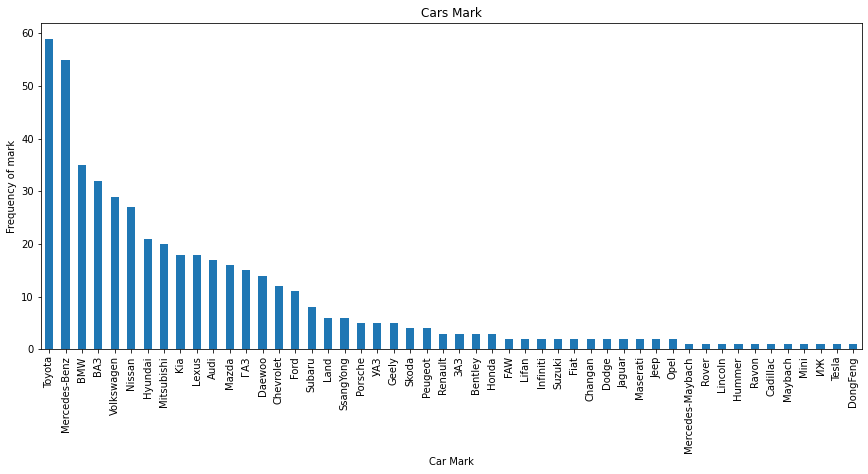

In [34]:
plt.figure(figsize=(50, 6))

plt.subplot(1,3,1)
plt1 = intersected_sel.Mark.value_counts().plot.bar()
plt.title('Cars Mark')
plt1.set(xlabel = 'Car Mark', ylabel='Frequency of mark')

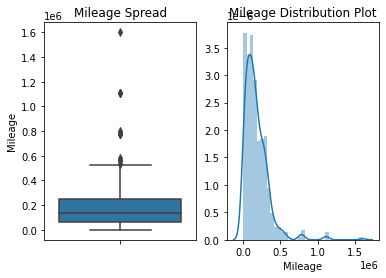

In [35]:
plt.subplot(1,2,1)
plt.title("Mileage Spread")
sns.boxplot(y=intersected_sel.Mileage)

plt.subplot(1,2,2)
plt.title("Mileage Distribution Plot")
sns.distplot(intersected_sel.Mileage)


plt.show()

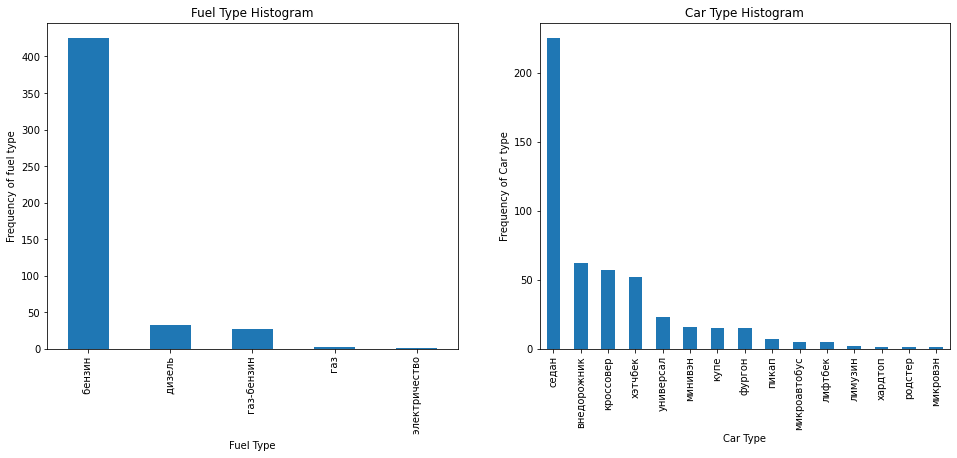

In [36]:
plt.figure(figsize=(25, 6))
plt.subplot(1,3,2)
plt1 = intersected_sel.FuelType.value_counts().plot.bar()
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = intersected_sel.Body.value_counts().plot.bar()
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

In [37]:
normal = Random_forest_data.GearboxType.value_counts()
normal

автомат      1007
механика      446
типтроник     191
вариатор       78
робот          10
Name: GearboxType, dtype: int64

In [38]:
abnormal = intersected_sel.GearboxType.value_counts()
abnormal

автомат      231
механика     189
типтроник     50
вариатор      14
робот          3
Name: GearboxType, dtype: int64

In [39]:
normal = Random_forest_data.Year.value_counts()
normal

2014    160
2013    148
2007    142
2012    100
2019     96
2015     79
2008     76
2018     76
2006     76
2011     74
2005     52
2017     47
2004     45
2010     43
2003     41
2020     40
1992     39
2016     39
2002     39
2009     29
1995     29
1994     28
1997     27
2001     27
1999     27
1998     23
1996     22
1993     22
1991     22
2000     21
1990     18
1989     11
1988      5
2021      3
1987      1
1986      1
1984      1
1981      1
1973      1
1966      1
Name: Year, dtype: int64

In [40]:
abnormal = intersected_sel.Year.value_counts()
abnormal

2007    44
2013    38
2014    32
2008    24
2012    23
2015    20
2006    20
2018    19
2004    18
2019    18
2016    18
2011    17
1992    16
1995    15
1999    13
1994    13
2002    13
2020    11
2000    11
1993    11
2017    10
1998     9
2003     8
1991     8
1990     8
2001     7
2010     7
1989     7
1997     6
1996     6
1988     4
2005     4
2009     3
1984     1
1981     1
2021     1
1986     1
1987     1
1966     1
Name: Year, dtype: int64